<a href="https://colab.research.google.com/github/IOlivaresPalma/Multimedia-Trabajos/blob/main/Actividad_7_OlivaresIvan_197615435.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 7</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Iván Olivares Palma</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV:
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

In [4]:
!git clone 'https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git'


Cloning into 'EIE_401_MULTIMEDIA'...
remote: Enumerating objects: 314, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 314 (delta 44), reused 63 (delta 14), pack-reused 219
Receiving objects: 100% (314/314), 11.16 MiB | 9.73 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [123]:
import cv2 as cv

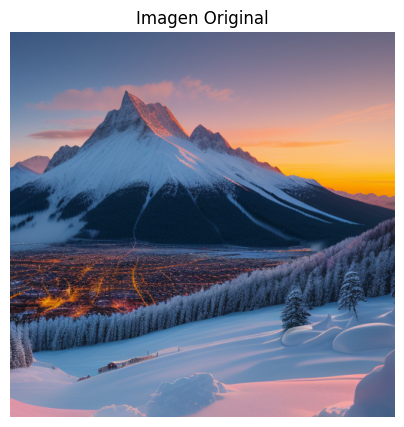

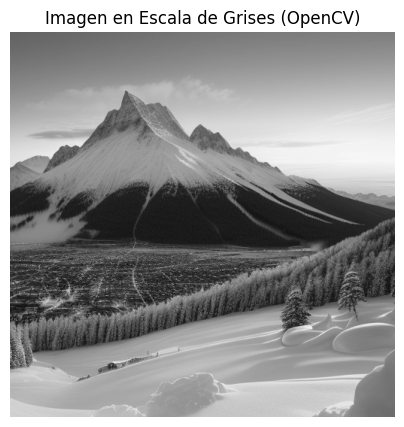

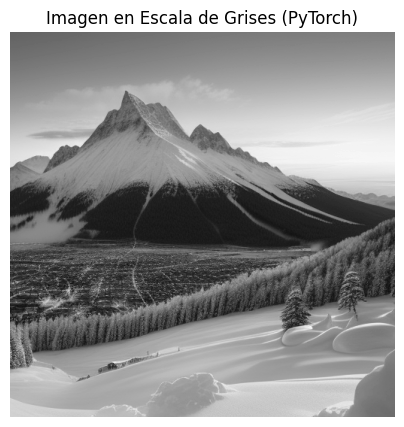

In [124]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# Ruta de la imagen
ruta_imagen = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'

# Cargar la imagen usando OpenCV
imagen_cv2 = cv2.imread(ruta_imagen)
imagen_cv2_rgb = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2RGB)

# Cargar la imagen usando NumPy
imagen_np = np.array(cv2.imread(ruta_imagen, cv2.IMREAD_COLOR))
imagen_np_rgb = cv2.cvtColor(imagen_np, cv2.COLOR_BGR2RGB)

# Cargar la imagen usando PIL y convertirla a un tensor de PyTorch
imagen_pil = Image.open(ruta_imagen).convert('RGB')
transformacion = transforms.ToTensor()
imagen_torch = transformacion(imagen_pil)

# Presentar la imagen original usando Matplotlib
plt.figure(figsize=(5,5))
plt.imshow(imagen_cv2_rgb)
plt.title('Imagen Original')
plt.axis('off')
plt.show()

# Convertir la imagen a escala de grises usando OpenCV
imagen_gray_cv2 = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2GRAY)

# Convertir la imagen a escala de grises usando NumPy
imagen_gray_np = cv2.cvtColor(imagen_np, cv2.COLOR_BGR2GRAY)

# Guardar la imagen en escala de grises usando OpenCV
cv2.imwrite('imagen_gray_cv2.jpg', imagen_gray_cv2)
cv2.imwrite('imagen_gray_np.jpg', imagen_gray_np)

# Convertir la imagen a escala de grises usando PyTorch
imagen_gray_torch = transforms.Grayscale()(imagen_torch)

# Convertir el tensor de PyTorch de vuelta a un array de NumPy
imagen_gray_np_torch = imagen_gray_torch.squeeze().numpy()

# Guardar la imagen en escala de grises usando OpenCV
cv2.imwrite('imagen_gray_torch.jpg', imagen_gray_np_torch * 255)

# Presentar la imagen en escala de grises usando OpenCV
plt.figure(figsize=(5,5))
plt.imshow(imagen_gray_cv2, cmap='gray')
plt.title('Imagen en Escala de Grises (OpenCV)')
plt.axis('off')
plt.show()

# Presentar la imagen en escala de grises usando PyTorch
plt.figure(figsize=(5,5))
plt.imshow(imagen_gray_np_torch, cmap='gray')
plt.title('Imagen en Escala de Grises (PyTorch)')
plt.axis('off')
plt.show()


## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

In [125]:
# Ruta de la imagen
ruta_imagen = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'

# Cargar la imagen usando OpenCV
imagen = cv2.imread(ruta_imagen)
imagen_ordenada = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2RGB)

In [126]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
imagen_rgb = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)

print(imagen_ordenada.shape)

img_transformada = np.zeros_like(imagen_ordenada)
print(img_transformada.shape)
umbral = 127
pendiente = 2


for i in range(imagen_ordenada.shape[0]):
    for j in range(imagen_ordenada.shape[1]):
      for k in range(imagen_ordenada.shape[2]):
        if imagen_ordenada[i,j,k] > 127:
          img_transformada[i,j,k] = min(255, int(imagen_ordenada[i,j,k] * pendiente))
        else:
          img_transformada[i,j,k] = max(0, int(imagen_ordenada[i,j,k] * pendiente))




(512, 512, 3)
(512, 512, 3)


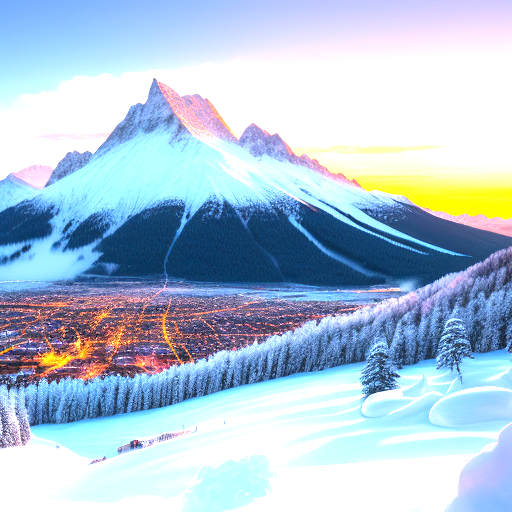

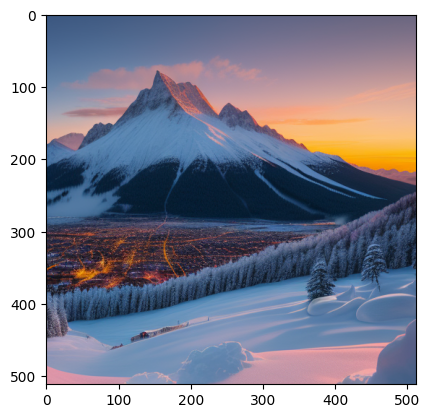

In [127]:
img_transformada.shape

#fig,ax = plt.subplots(1,2)
#ax[0].imshow(imagen_ordenada)
#ax[1].imshow(img_transformada)
op = cv.cvtColor(img_transformada, cv.COLOR_RGB2BGR)

cv2_imshow(op)

plt.imshow(imagen_ordenada)



#### 2.2 Aplica una transformación en la vecindad.
- Debes hacer una vecindad con dimensiones de 5x5 pixeles.
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



In [128]:
# Se realiza la operacion en imagen_ordenada...
n = 5
vecindad = np.ones((n,n), np.uint8)

# Recorrer imagen con la matriz de vecindad
# imagen_ordenada.shape = (512,512,3)...

# imagen nueva...
img_22 = np.zeros_like(imagen_ordenada,dtype=np.uint8) # Imagen ejercicio 2.2
print(img_22.shape)
# Recorrer las 3 capas...
for i in range(imagen_ordenada.shape[2]):
    # Recorrer columna de la imagen de cada capa
    for j in range(imagen_ordenada.shape[1]-4):
      #print(f"Extrayendo en columna : {j}")
      # Recorrer filas de la imagen de cada capa
      for k in range(imagen_ordenada.shape[0]-4):
        #print(f"Extrayendo en fila : {k}")
        ventana = imagen_ordenada[k:k+n,j:j+n,i]
        maximo = np.max(ventana)
        img_22[k:k+n,j:j+n,i] = np.max(imagen_ordenada[k:k+n,j:j+n,i])




(512, 512, 3)


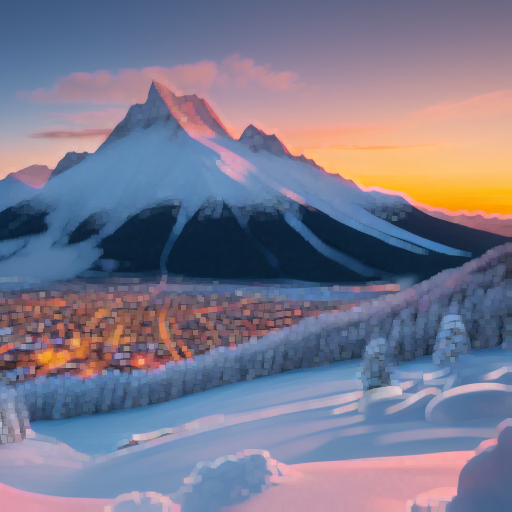

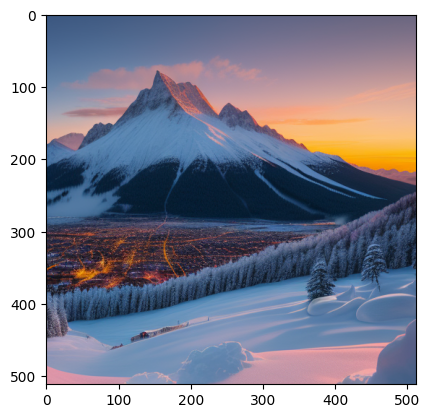

In [129]:
op = cv.cvtColor(img_22, cv.COLOR_RGB2BGR)

cv2_imshow(op)

plt.imshow(imagen_ordenada)



#### 2.3 Aplica transformación de intensidad
- Debes hacer una vecindad con dimensiones de 10x10 pixeles.
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

In [130]:
def clog(c,matrx):
  #s = c*log(1+r)
  clog_mtrx = np.zeros_like(matrx,dtype=np.uint8)
  col,row = matrx.shape
  for i in range(col):
    for j in range(row):
      clog_mtrx[i,j] = int(c*np.log10(1+matrx[i,j]))

  return clog_mtrx

In [131]:
# Trabajar con imagen_ordenada
# aplicar s = clog(1+r)

img_clog = np.zeros_like(imagen_ordenada,dtype=np.uint8) # Imagen ejercicio 2.3

# Se aplica transformacion de intensidad logaritmica
r = np.max(imagen_ordenada)
c = 255/np.log(1+r)
#c = 10

for i in range(imagen_ordenada.shape[2]):
    # Recorrer columna de la imagen de cada capa
    for j in range(imagen_ordenada.shape[1]-10):
      #print(f"Extrayendo en columna : {j}")
      # Recorrer filas de la imagen de cada capa
      for k in range(imagen_ordenada.shape[0]-10):
        #print(f"Extrayendo en fila : {k}")
        ventana = imagen_ordenada[k:k+10,j:j+10,i]
        clog_mtrx = clog(c,ventana)
        img_clog[k:k+10,j:j+10,i] = clog_mtrx



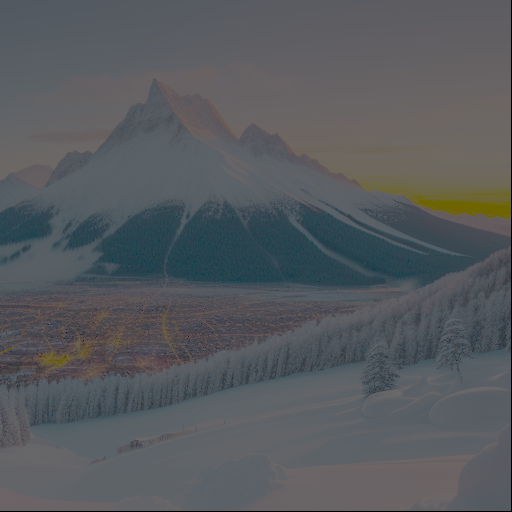

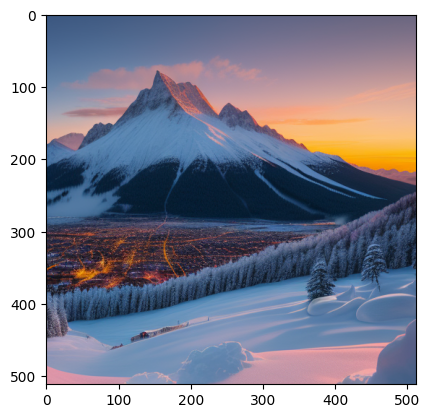

In [132]:
op = cv.cvtColor(img_clog, cv.COLOR_RGB2BGR)

cv2_imshow(op)

plt.imshow(imagen_ordenada)


#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada.
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

torch.Size([1, 3, 512, 512])
torch.Size([1, 16, 512, 512])


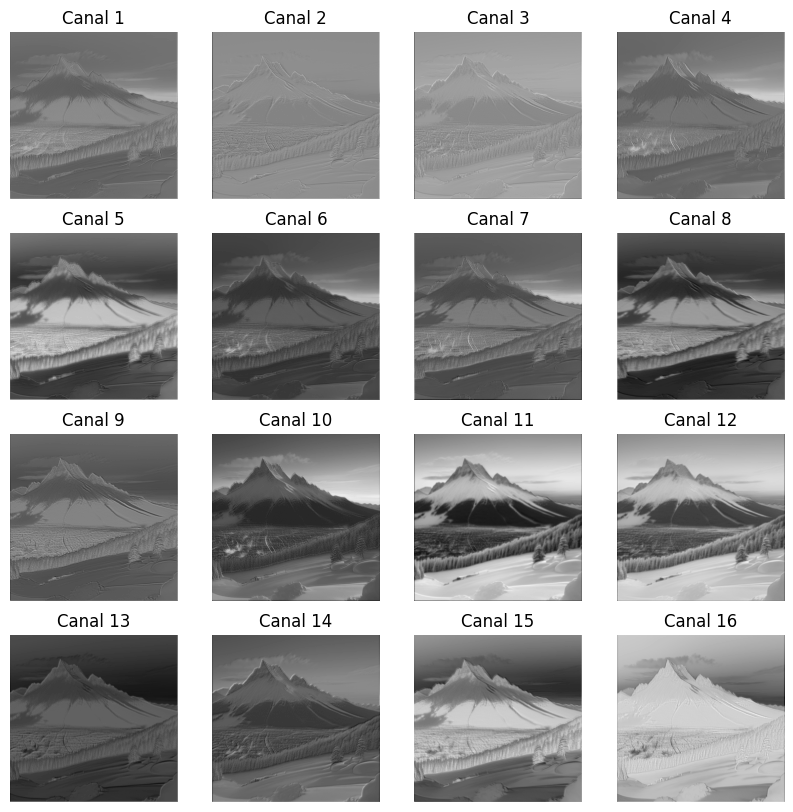

In [133]:
from PIL import Image
from torchvision import transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Definir la transformación: de imagen a tensor
transformacion = transforms.ToTensor()

# Aplicar la transformación y añadir una dimensión para el batch
# La imagen resultante tendrá la forma (1, 3, 512, 512)
tensor_imagen = transformacion(imagen_ordenada).unsqueeze(0)

# Verificar la forma del tensor resultante
print(tensor_imagen.shape)  # Debe ser (1, 3, 512, 512)

# Definir las capas de convolución
# La primera convolución toma 3 canales de entrada (RGB) y produce 16 canales de salida
conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
# La segunda convolución toma 16 canales de entrada y produce 16 canales de salida
conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
# La tercera convolución toma 16 canales de entrada y produce 16 canales de salida
conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)

# Aplicar las convoluciones en cascada
# La primera convolución
resultado1 = conv1(tensor_imagen)
# La segunda convolución sobre el resultado de la primera
resultado2 = conv2(resultado1)
# La tercera convolución sobre el resultado de la segunda
resultado3 = conv3(resultado2)

# Verificar la forma del tensor después de las convoluciones
print(resultado3.shape)  # Debe ser (1, 16, 512, 512)

# Mostrar los 16 canales resultantes
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):
    # Extraer el i-ésimo canal del resultado de la tercera convolución
    imagen = resultado3[0, i].detach().numpy()
    # Mostrar el canal en escala de grises
    axs[i // 4, i % 4].imshow(imagen, cmap='gray')
    # Opcional: añadir un título con el número del canal
    axs[i // 4, i % 4].set_title(f'Canal {i+1}')
    axs[i // 4, i % 4].axis('off')  # Opcional: desactivar los ejes

# Mostrar la figura
plt.show()


## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


In [136]:
def binarizar(img, umbral):
  img_bin = np.zeros_like(img,dtype=np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i,j] > umbral:
        img_bin[i,j] = 255
      else:
        img_bin[i,j] = 0
  return img_bin

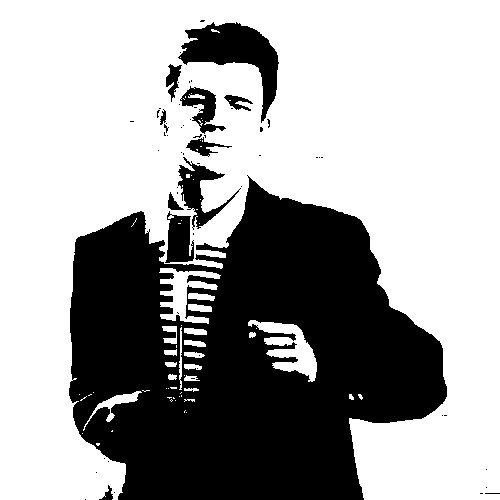

In [137]:
imagen_31 = cv.imread("/content/NGGYU.jpg")
imagen_31 = cv.cvtColor(imagen_31, cv.COLOR_BGR2GRAY)
img31_bin = binarizar(imagen_31,127)

cv2_imshow(img31_bin)


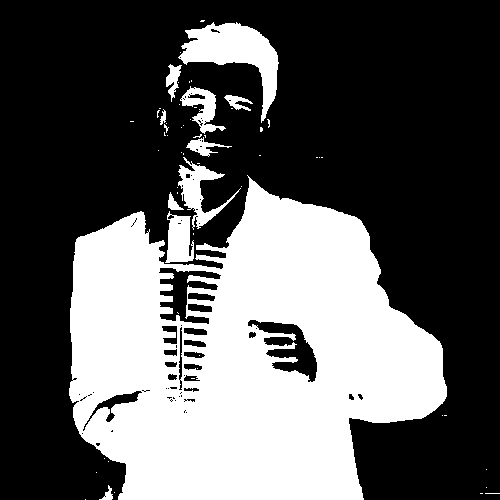

In [138]:
# Invertir imagen
inverted_img = 255 - img31_bin
cv2_imshow(inverted_img)


### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



In [139]:
!pip install torch opencv-python --quiet


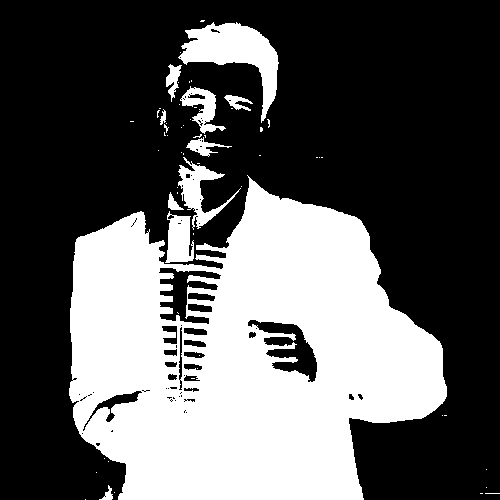

In [140]:
import cv2
import torch


# Convertir la imagen a un tensor de PyTorch
tensor_imagen = torch.tensor(img31_bin, dtype=torch.float32)

# Invertir los valores de la imagen
tensor_invertido = 255 - tensor_imagen

# Convertir el tensor invertido de vuelta a una imagen de OpenCV
imagen_invertida = tensor_invertido.numpy().astype('uint8')

# Mostrar la imagen invertida
cv2_imshow(imagen_invertida)

## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor.
    

In [ ]:
imagen_ordenada = imagen_ordenada

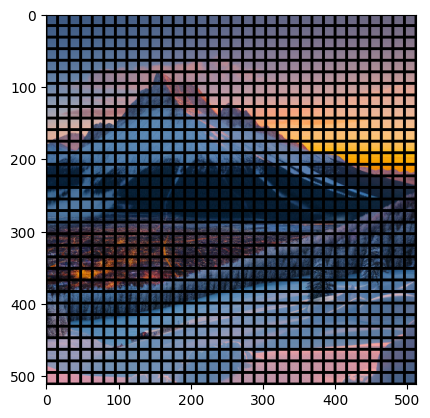

In [141]:
n = 16
ventana = np.zeros((n,n),dtype=np.uint8)
ventana[2:n-2,2:n-2] = 1



col,row,capa = imagen_ordenada.shape

for i in range(capa):
  for j in range(0,row,n):
    for k in range(0,col,n):
      imagen_ordenada[k:k+n,j:j+n,i] = imagen_ordenada[k:k+n,j:j+n,i] * ventana

plt.imshow(imagen_ordenada)

## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.

[Procesamiento de imagenes](https://jhovhapdi.blogspot.com/2016/10/las-transformaciones-mas-simples-son_31.html)
